<a href="https://colab.research.google.com/github/morozovsolncev/gravitation/blob/main/Gravitation_2026_onto_release_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ: РЕАЛЬНАЯ СИСТЕМА ЗЕМЛЯ-ЛУНА
Приложение к книге 'Онтология гравитации, Морозов А.Ю.'
Безразмерные параметры: k = 2.31e-11, η = 8.67e+10
Начальные условия: r0 = [0.945, 0], v0 = [0, 1.056]

Интегрирование уравнений движения...
✓ Интегрирование успешно завершено

✓ Графики сохранены в 'ontology_moon_orbit_book_final.png' (300 DPI)
✓ Графики также сохранены в 'ontology_moon_orbit_book_final.pdf' (векторный формат)

СВОДКА РЕЗУЛЬТАТОВ ДЛЯ КНИГИ:
1. Параметры орбиты:
   • Эксцентриситет: 0.055932 (реальный: ~0.055)
   • Расстояние: от 363.3 до 406.3×10⁶ м

2. Онтологические величины (абсолютные значения):
   • ⟨β_Ω⟩ = -2.31e-11
   • ⟨|∇[ln(P_res)]|⟩ = 2.31e-11
   • ⟨V⟩ = -2.31e-11

3. Относительные изменения (амплитуды):
   • Δβ_Ω/⟨β_Ω⟩ = 1.1e-01
   • ΔV/|⟨V⟩| = 1.1e-01
   • ΔP_res/⟨P_res⟩ = 2.6e-12

4. Ключевые соотношения:
   • Корреляция ∇[ln(P_res)] и a: 0.999902
   • Рост S_Ω за 5 периодов: -8.2e-13
   • Флуктуация взвешенной сложности: 7.9e-02

5. Проверка зак

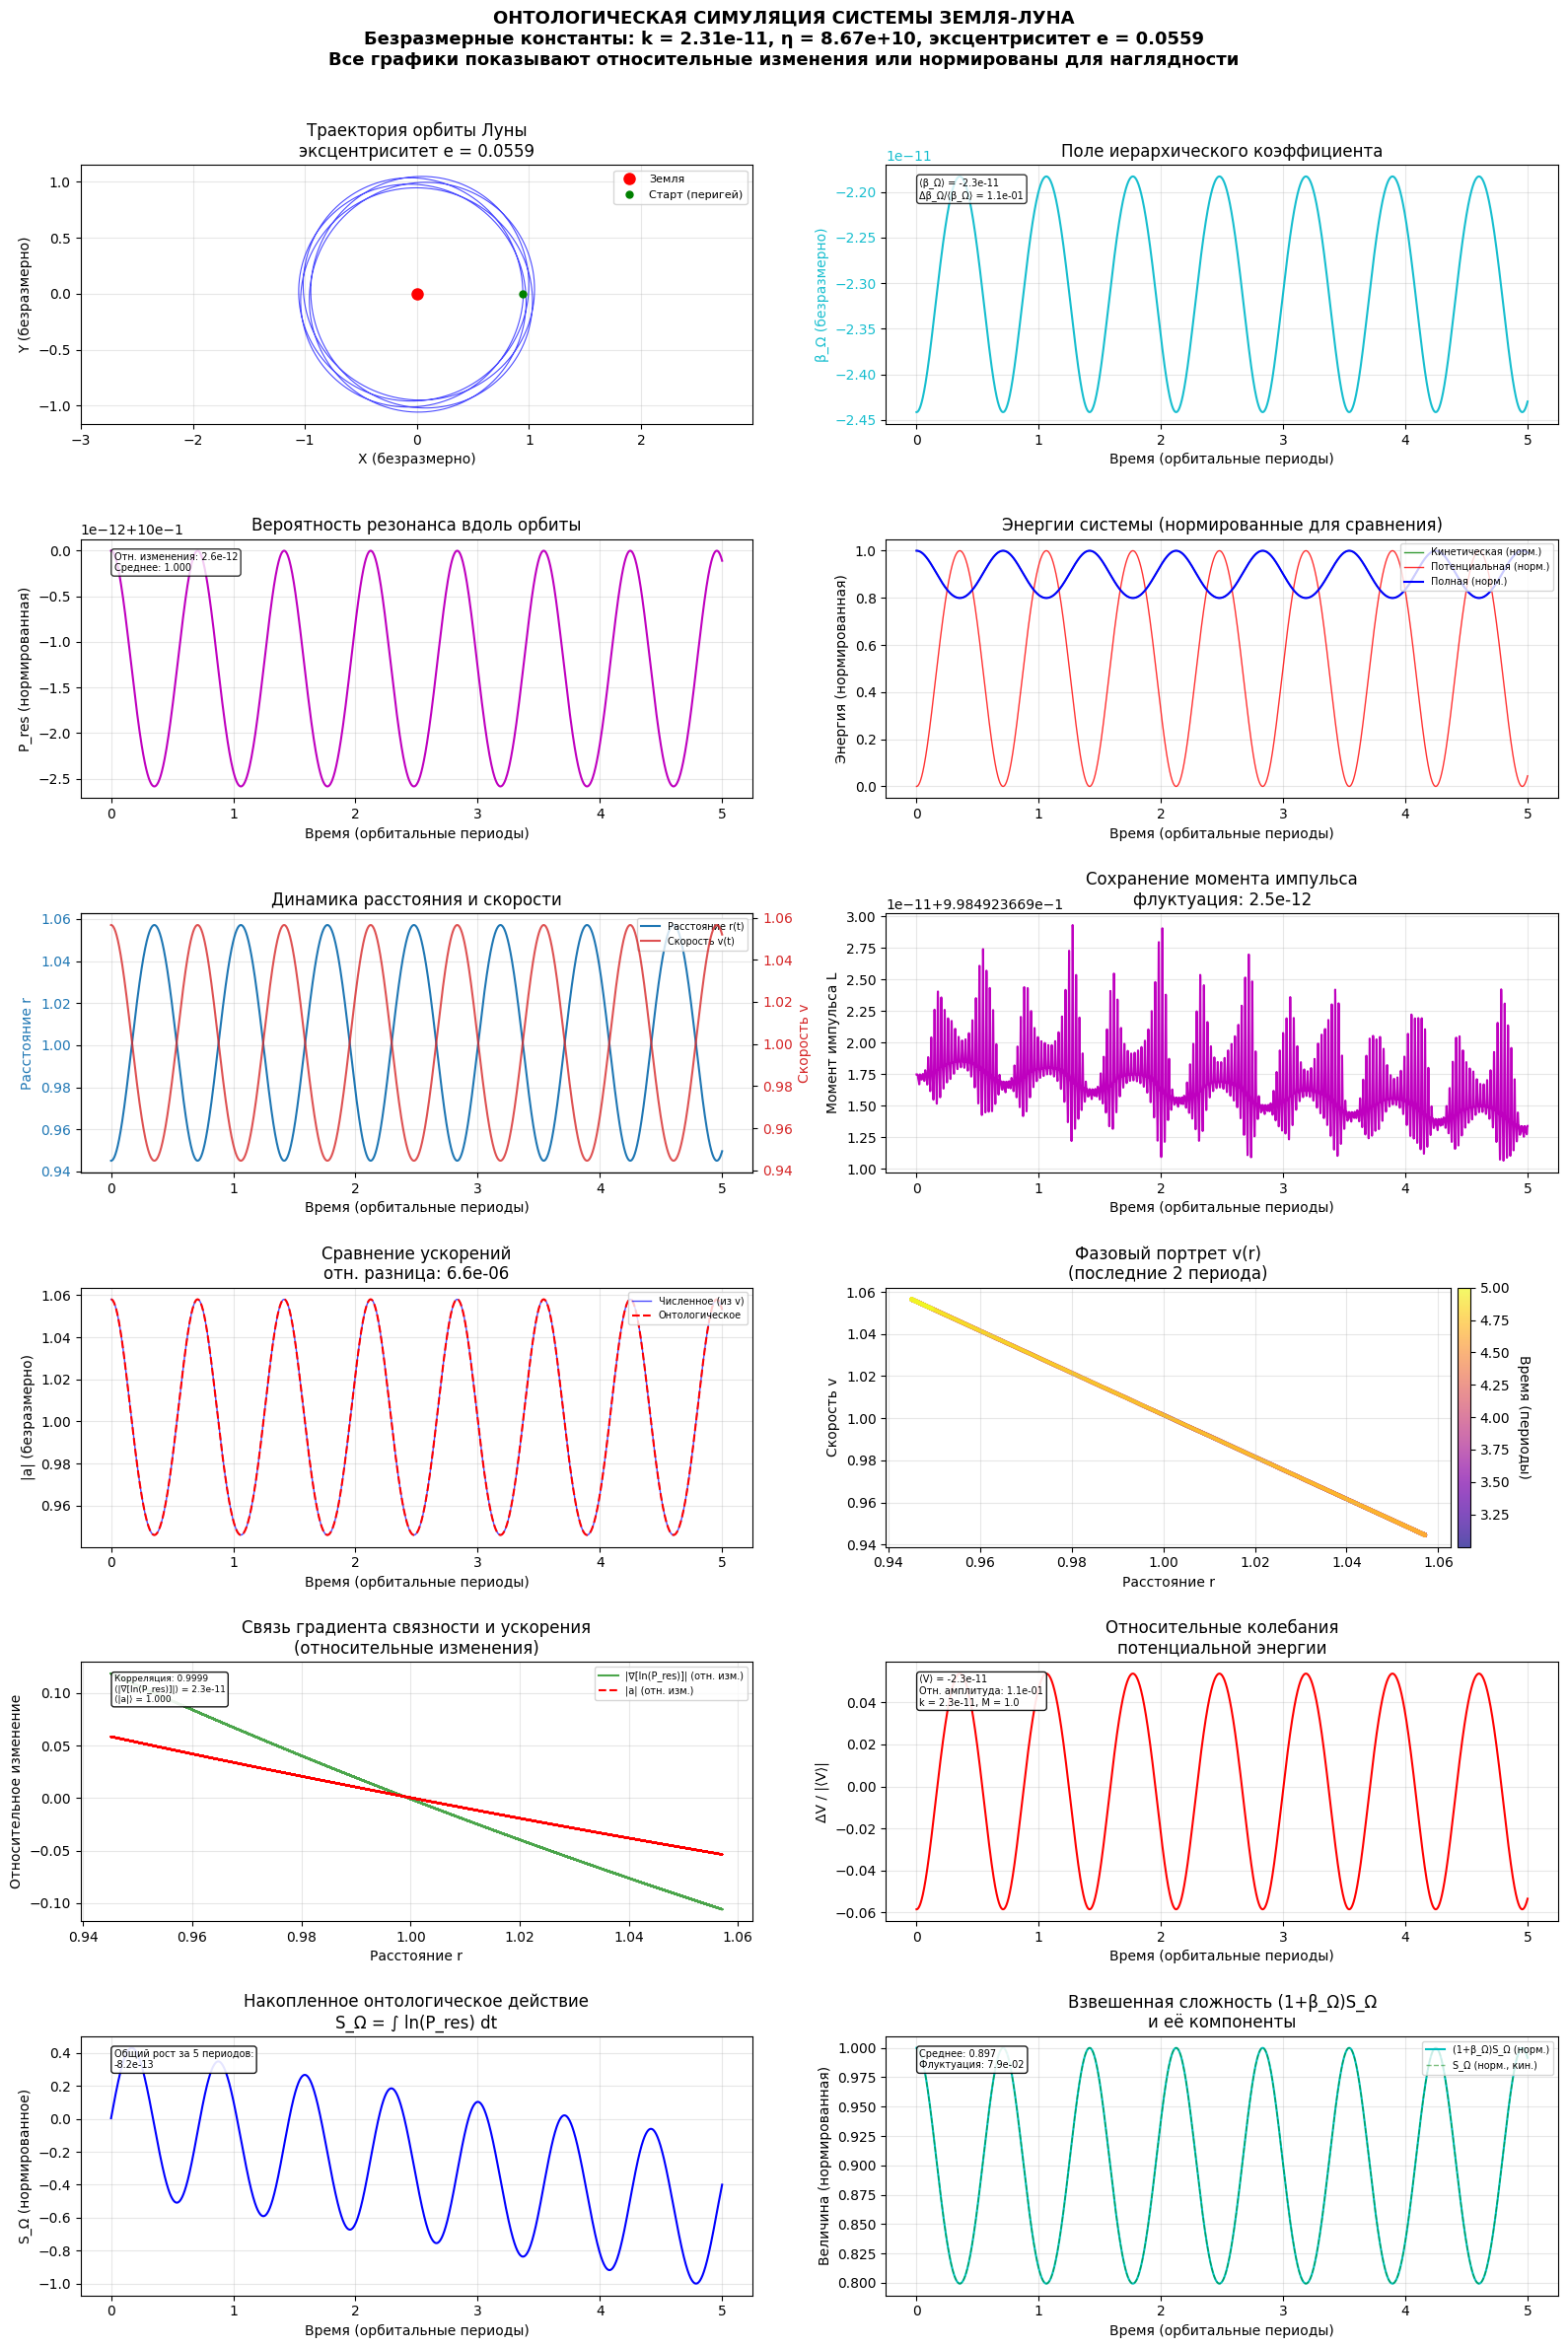

In [2]:
"""
ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ СИСТЕМЫ ЗЕМЛЯ-ЛУНА
# Программа написана на языке Python и опубликована по адресу https://github.com/morozovsolncev/gravitation
# Приложение к книге 'Онтология гравитации, Морозов А.Ю.
"""

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# ============================================================================
# 1. ФИЗИЧЕСКИЕ КОНСТАНТЫ И ПРИВЕДЕНИЕ К БЕЗРАЗМЕРНОМУ ВИДУ
# ============================================================================

print("=" * 70)
print("ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ: РЕАЛЬНАЯ СИСТЕМА ЗЕМЛЯ-ЛУНА")
print("Приложение к книге 'Онтология гравитации, Морозов А.Ю.'")
print("=" * 70)

# Фундаментальные физические константы (СИ)
c = 299792458.0
G = 6.67430e-11
M_earth_phys = 5.9722e24

# Параметры орбиты Луны
r_perigee_phys = 363.3e6
r_apogee_phys = 405.5e6
semi_major_axis_phys = (r_perigee_phys + r_apogee_phys) / 2

# Базовые единицы для приведения
L0 = semi_major_axis_phys
M0 = M_earth_phys
T0 = np.sqrt(L0**3 / (G * M0))
V0 = L0 / T0

# Приведённые (безразмерные) параметры
M = M_earth_phys / M0
r_perigee = r_perigee_phys / L0
r_apogee = r_apogee_phys / L0
semi_major_axis = 1.0

# Онтологические константы в безразмерных единицах
eta = (c**2) * (T0**2 / L0**2)
k = (2 * G / (c**2)) * (M0 / L0)

# Начальные условия (Луна в перигее)
v_perigee_phys = np.sqrt(G * M_earth_phys * (2/r_perigee_phys - 1/semi_major_axis_phys))
v_perigee = v_perigee_phys / V0
r0_vec = np.array([r_perigee, 0.0])
v0_vec = np.array([0.0, v_perigee])

# Безразмерный орбитальный период
T_orbit = 2 * np.pi

print(f"Безразмерные параметры: k = {k:.2e}, η = {eta:.2e}")
print(f"Начальные условия: r0 = [{r0_vec[0]:.3f}, 0], v0 = [0, {v0_vec[1]:.3f}]")
print()

# ============================================================================
# 2. ОПРЕДЕЛЕНИЕ ОНТОЛОГИЧЕСКИХ ФУНКЦИЙ
# ============================================================================

def beta_field(r_vec):
    """Поле иерархического коэффициента β_Ω."""
    r = np.linalg.norm(r_vec)
    return -k * M / r

def ln_P_res(r_vec):
    """Логарифм вероятности резонанса."""
    r = np.linalg.norm(r_vec)
    return -k * M * np.log(r)

def ontologic_acceleration(r_vec):
    """Ускорение из онтологического принципа."""
    r = np.linalg.norm(r_vec)
    grad_lnP = -k * M * r_vec / r**2
    return (eta / 2.0) * grad_lnP

def system_dynamics(t, state):
    """Правые части уравнений движения."""
    x, y, vx, vy = state
    r_vec = np.array([x, y])
    a_vec = ontologic_acceleration(r_vec)
    return [vx, vy, a_vec[0], a_vec[1]]

# ============================================================================
# 3. ИНТЕГРИРОВАНИЕ УРАВНЕНИЙ ДВИЖЕНИЯ
# ============================================================================

print("Интегрирование уравнений движения...")
initial_state = np.concatenate([r0_vec, v0_vec])
t_span = (0, T_orbit * 5)
t_eval = np.linspace(0, T_orbit * 5, 5000)

solution = solve_ivp(system_dynamics, t_span, initial_state,
                     t_eval=t_eval, method='DOP853',
                     rtol=1e-12, atol=1e-12)
print("✓ Интегрирование успешно завершено")
print()

# Извлечение результатов
x, y = solution.y[0], solution.y[1]
vx, vy = solution.y[2], solution.y[3]
times = solution.t

# ============================================================================
# 4. ВЫЧИСЛЕНИЕ АНАЛИЗИРУЕМЫХ ВЕЛИЧИН
# ============================================================================

# Базовые динамические величины
positions = np.column_stack([x, y])
velocities = np.column_stack([vx, vy])
r = np.array([np.linalg.norm(p) for p in positions])
v = np.array([np.linalg.norm(v) for v in velocities])

# Онтологические величины
beta_values = np.array([beta_field(p) for p in positions])
lnP_values = np.array([ln_P_res(p) for p in positions])
P_res_values = np.exp(lnP_values - np.max(lnP_values))

# Динамические инварианты
kinetic = 0.5 * v**2
potential = -k * M / r
total_energy = kinetic + potential
angular_momentum = x * vy - y * vx

# Ускорения для проверки
acc_ontologic = np.array([ontologic_acceleration(p) for p in positions])
acc_norm_ontologic = np.linalg.norm(acc_ontologic, axis=1)
acc_numerical = np.gradient(velocities.T, times, axis=1).T
acc_norm_numerical = np.linalg.norm(acc_numerical, axis=1)

# Аналитический градиент для графика
grad_lnP_analytic = k * M / r**2
acc_theory = (eta / 2) * grad_lnP_analytic

# Параметры орбиты для заголовков
r_min, r_max = np.min(r), np.max(r)
eccentricity = (r_max - r_min) / (r_max + r_min)


# Накопленное онтологическое действие S_Ω (аналог интеграла от ln(P_res))
# В дискретном виде: S_Ω = Σ ln(P_res) * Δt
dt = times[1] - times[0]
S_Omega_cumulative = np.cumsum(lnP_values) * dt

# Взвешенная сложность (1 + β_Ω)S_Ω (главный оптимизируемый функционал)
weighted_complexity = (1 + beta_values) * kinetic  # Используем kinetic как меру S_Ω

# Эффективный потенциал связи: φ_eff = -ln(P_res)
phi_eff = -lnP_values

# Локальная "сила связи": производная β_Ω по времени
beta_dot = np.gradient(beta_values, times)

# ============================================================================
# 6. ВИЗУАЛИЗАЦИЯ
# ============================================================================

fig = plt.figure(figsize=(16, 24))

# ----------------------------------------------------------------------------
# РЯД 1: Траектория и поле связности
# ----------------------------------------------------------------------------

# 1.1 Траектория орбиты
ax1 = plt.subplot(6, 2, 1)
ax1.plot(x, y, 'b-', alpha=0.7, linewidth=0.8)
ax1.plot(0, 0, 'ro', markersize=8, label='Земля')
ax1.plot(x[0], y[0], 'go', markersize=5, label='Старт (перигей)')
ax1.set_xlabel('X (безразмерно)')
ax1.set_ylabel('Y (безразмерно)')
ax1.set_title(f'Траектория орбиты Луны\nэксцентриситет e = {eccentricity:.4f}')
ax1.legend(loc='upper right', fontsize=8)
ax1.grid(True, alpha=0.3)
ax1.axis('equal')

# 1.2 Поле β_Ω вдоль орбиты
ax2 = plt.subplot(6, 2, 2)
color_beta = 'tab:cyan'
ax2.plot(times/T_orbit, beta_values, color=color_beta, linewidth=1.5, label='β_Ω(r)')
ax2.set_xlabel('Время (орбитальные периоды)')
ax2.set_ylabel('β_Ω (безразмерно)', color=color_beta)
ax2.tick_params(axis='y', labelcolor=color_beta)
ax2.set_title('Поле иерархического коэффициента')
ax2.grid(True, alpha=0.3)
# Информация о масштабе
ax2.text(0.05, 0.95, f'⟨β_Ω⟩ = {np.mean(beta_values):.1e}\n'
                      f'Δβ_Ω/⟨β_Ω⟩ = {(np.max(beta_values)-np.min(beta_values))/np.abs(np.mean(beta_values)):.1e}',
         transform=ax2.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# ----------------------------------------------------------------------------
# РЯД 2: Вероятность резонанса и энергии
# ----------------------------------------------------------------------------

# 2.1 Вероятность резонанса P_res
ax3 = plt.subplot(6, 2, 3)
ax3.plot(times/T_orbit, P_res_values, 'm-', linewidth=1.5)
ax3.set_xlabel('Время (орбитальные периоды)')
ax3.set_ylabel('P_res (нормированная)')
ax3.set_title('Вероятность резонанса вдоль орбиты')
ax3.grid(True, alpha=0.3)
# Относительные изменения P_res
P_res_rel = (P_res_values - np.mean(P_res_values)) / np.mean(P_res_values)
P_res_amp = np.max(P_res_rel) - np.min(P_res_rel)
ax3.text(0.05, 0.95, f'Отн. изменения: {P_res_amp:.1e}\n'
                      f'Среднее: {np.mean(P_res_values):.3f}',
         transform=ax3.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# 2.2 Энергии системы (нормированные для сравнения)
ax4 = plt.subplot(6, 2, 4)
kinetic_norm = kinetic / np.max(kinetic)
potential_norm = (potential - np.min(potential)) / (np.max(potential) - np.min(potential))
total_norm = total_energy / np.max(np.abs(total_energy))

ax4.plot(times/T_orbit, kinetic_norm, 'g-', alpha=0.8, linewidth=1, label='Кинетическая (норм.)')
ax4.plot(times/T_orbit, potential_norm, 'r-', alpha=0.8, linewidth=1, label='Потенциальная (норм.)')
ax4.plot(times/T_orbit, total_norm, 'b-', linewidth=1.5, label='Полная (норм.)')
ax4.set_xlabel('Время (орбитальные периоды)')
ax4.set_ylabel('Энергия (нормированная)')
ax4.set_title('Энергии системы (нормированные для сравнения)')
ax4.legend(loc='upper right', fontsize=7)
ax4.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 3: Динамика расстояния и скорости + момент импульса
# ----------------------------------------------------------------------------

# 3.1 Расстояние и скорость
ax5 = plt.subplot(6, 2, 5)
color_r2 = 'tab:blue'
ax5.plot(times/T_orbit, r, color=color_r2, linewidth=1.5, label='Расстояние r(t)')
ax5.set_xlabel('Время (орбитальные периоды)')
ax5.set_ylabel('Расстояние r', color=color_r2)
ax5.tick_params(axis='y', labelcolor=color_r2)
ax5.set_title('Динамика расстояния и скорости')
ax5.grid(True, alpha=0.3)

ax5b = ax5.twinx()
color_v = 'tab:red'
ax5b.plot(times/T_orbit, v, color=color_v, alpha=0.8, linewidth=1.5, label='Скорость v(t)')
ax5b.set_ylabel('Скорость v', color=color_v)
ax5b.tick_params(axis='y', labelcolor=color_v)

lines5, labels5 = ax5.get_legend_handles_labels()
lines5b, labels5b = ax5b.get_legend_handles_labels()
ax5.legend(lines5 + lines5b, labels5 + labels5b, loc='upper right', fontsize=7)

# 3.2 Момент импульса
ax6 = plt.subplot(6, 2, 6)
ax6.plot(times/T_orbit, angular_momentum, 'm-', linewidth=1.5)
ax6.set_xlabel('Время (орбитальные периоды)')
ax6.set_ylabel('Момент импульса L')
ax6.set_title(f'Сохранение момента импульса\nфлуктуация: {np.std(angular_momentum)/np.mean(np.abs(angular_momentum)):.1e}')
ax6.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 4: Сравнение ускорений + фазовый портрет
# ----------------------------------------------------------------------------

# 4.1 Сравнение ускорений
ax7 = plt.subplot(6, 2, 7)
ax7.plot(times/T_orbit, acc_norm_numerical, 'b-', alpha=0.7, linewidth=1, label='Численное (из v)')
ax7.plot(times/T_orbit, acc_norm_ontologic, 'r--', linewidth=1.5, label='Онтологическое')
ax7.set_xlabel('Время (орбитальные периоды)')
ax7.set_ylabel('|a| (безразмерно)')
ax7.set_title(f'Сравнение ускорений\nотн. разница: {np.mean(np.abs(acc_norm_ontologic - acc_norm_numerical)/acc_norm_ontologic):.1e}')
ax7.legend(loc='upper right', fontsize=7)
ax7.grid(True, alpha=0.3)

# 4.2 Фазовый портрет v(r)
ax8 = plt.subplot(6, 2, 8)
mask = times > T_orbit * 3  # Последние 2 периода
sc = ax8.scatter(r[mask], v[mask], c=times[mask]/T_orbit,
                 cmap='plasma', s=10, alpha=0.7, edgecolors='none')
ax8.set_xlabel('Расстояние r')
ax8.set_ylabel('Скорость v')
ax8.set_title('Фазовый портрет v(r)\n(последние 2 периода)')
cbar = plt.colorbar(sc, ax=ax8, pad=0.01)
cbar.set_label('Время (периоды)', rotation=270, labelpad=15)
ax8.grid(True, alpha=0.3)

# ----------------------------------------------------------------------------
# РЯД 5: ОТНОСИТЕЛЬНЫЕ ИЗМЕНЕНИЯ (ключевые онтологические величины)
# ----------------------------------------------------------------------------

# 5.1 Относительные изменения градиента ln(P_res) и ускорения
ax9 = plt.subplot(6, 2, 9)

# Относительные изменения (центрированные и нормированные)
grad_rel = (grad_lnP_analytic - np.mean(grad_lnP_analytic)) / np.mean(grad_lnP_analytic)
acc_rel = (acc_norm_ontologic - np.mean(acc_norm_ontologic)) / np.mean(acc_norm_ontologic)

ax9.plot(r, grad_rel, 'g-', alpha=0.7, linewidth=1.5,
         label='|∇[ln(P_res)]| (отн. изм.)')
ax9.plot(r, acc_rel, 'r--', linewidth=1.5, label='|a| (отн. изм.)')
ax9.set_xlabel('Расстояние r')
ax9.set_ylabel('Относительное изменение')
ax9.set_title('Связь градиента связности и ускорения\n(относительные изменения)')
ax9.legend(loc='upper right', fontsize=7)
ax9.grid(True, alpha=0.3)

# Корреляция и абсолютные значения
correlation = np.corrcoef(grad_rel, acc_rel)[0, 1]
ax9.text(0.05, 0.95, f'Корреляция: {correlation:.4f}\n'
                      f'⟨|∇[ln(P_res)]|⟩ = {np.mean(grad_lnP_analytic):.1e}\n'
                      f'⟨|a|⟩ = {np.mean(acc_norm_ontologic):.3f}',
         transform=ax9.transAxes, fontsize=6.5,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# 5.2 Относительные изменения потенциальной энергии
ax10 = plt.subplot(6, 2, 10)

pot_rel = (potential - np.mean(potential)) / np.abs(np.mean(potential))

ax10.plot(times/T_orbit, pot_rel, 'r-', linewidth=1.5)
ax10.set_xlabel('Время (орбитальные периоды)')
ax10.set_ylabel('ΔV / |⟨V⟩|')
ax10.set_title('Относительные колебания\nпотенциальной энергии')
ax10.grid(True, alpha=0.3)

# Информация о реальных масштабах
pot_amp = np.max(pot_rel) - np.min(pot_rel)
ax10.text(0.05, 0.95,
          f'⟨V⟩ = {np.mean(potential):.1e}\n'
          f'Отн. амплитуда: {pot_amp:.1e}\n'
          f'k = {k:.1e}, M = {M:.1f}',
         transform=ax10.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# ----------------------------------------------------------------------------
# РЯД 6: КЛЮЧЕВЫЕ ОНТОЛОГИЧЕСКИЕ СООТНОШЕНИЯ
# ----------------------------------------------------------------------------

# 6.1 Накопленное онтологическое действие S_Ω
ax11 = plt.subplot(6, 2, 11)

# Нормируем S_Ω для наглядности
S_Omega_norm = S_Omega_cumulative / np.max(np.abs(S_Omega_cumulative))

ax11.plot(times/T_orbit, S_Omega_norm, 'b-', linewidth=1.5)
ax11.set_xlabel('Время (орбитальные периоды)')
ax11.set_ylabel('S_Ω (нормированное)')
ax11.set_title('Накопленное онтологическое действие\nS_Ω = ∫ ln(P_res) dt')
ax11.grid(True, alpha=0.3)

# Показать, что S_Ω монотонно растёт (с небольшими колебаниями)
S_Omega_growth = S_Omega_cumulative[-1] - S_Omega_cumulative[0]
ax11.text(0.05, 0.95, f'Общий рост за 5 периодов:\n{S_Omega_growth:.1e}',
         transform=ax11.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# 6.2 Взвешенная сложность (1 + β_Ω)S_Ω
ax12 = plt.subplot(6, 2, 12)

# Используем кинетическую энергию как меру S_Ω для взвешенной сложности
# Нормируем для наглядности
weighted_complexity_norm = weighted_complexity / np.max(np.abs(weighted_complexity))

ax12.plot(times/T_orbit, weighted_complexity_norm, 'c-', linewidth=1.5, label='(1+β_Ω)S_Ω (норм.)')
ax12.plot(times/T_orbit, kinetic/np.max(kinetic), 'g--', alpha=0.5, linewidth=1, label='S_Ω (норм., кин.)')
ax12.set_xlabel('Время (орбитальные периоды)')
ax12.set_ylabel('Величина (нормированная)')
ax12.set_title('Взвешенная сложность (1+β_Ω)S_Ω\nи её компоненты')
ax12.legend(loc='upper right', fontsize=7)
ax12.grid(True, alpha=0.3)

# Показать среднее значение и флуктуации
wc_mean = np.mean(weighted_complexity_norm)
wc_std = np.std(weighted_complexity_norm)
ax12.text(0.05, 0.95, f'Среднее: {wc_mean:.3f}\n'
                       f'Флуктуация: {wc_std/wc_mean:.1e}',
         transform=ax12.transAxes, fontsize=7,
         verticalalignment='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.9))

# ============================================================================
# 7. ФИНАЛЬНАЯ НАСТРОЙКА И СОХРАНЕНИЕ
# ============================================================================

plt.suptitle('ОНТОЛОГИЧЕСКАЯ СИМУЛЯЦИЯ СИСТЕМЫ ЗЕМЛЯ-ЛУНА\n' +
             f'Безразмерные константы: k = {k:.2e}, η = {eta:.2e}, эксцентриситет e = {eccentricity:.4f}\n' +
             'Все графики показывают относительные изменения или нормированы для наглядности',
             fontsize=13, fontweight='bold', y=0.99)

plt.tight_layout(rect=[0, 0, 1, 0.98])  # Оставляем место для общего заголовка
plt.savefig('ontology_moon_orbit_book_final.png', dpi=300, bbox_inches='tight')
print("✓ Графики сохранены в 'ontology_moon_orbit_book_final.png' (300 DPI)")

# Дополнительно: сохранение в высоком разрешении для печати
plt.savefig('ontology_moon_orbit_book_final.pdf', format='pdf', dpi=300, bbox_inches='tight')
print("✓ Графики также сохранены в 'ontology_moon_orbit_book_final.pdf' (векторный формат)")

# ============================================================================
# 8. ВЫВОД СВОДНОЙ ИНФОРМАЦИИ
# ============================================================================

print("\n" + "=" * 70)
print("СВОДКА РЕЗУЛЬТАТОВ ДЛЯ КНИГИ:")
print("=" * 70)
print(f"1. Параметры орбиты:")
print(f"   • Эксцентриситет: {eccentricity:.6f} (реальный: ~0.055)")
print(f"   • Расстояние: от {r_min*L0/1e6:.1f} до {r_max*L0/1e6:.1f}×10⁶ м")

print(f"\n2. Онтологические величины (абсолютные значения):")
print(f"   • ⟨β_Ω⟩ = {np.mean(beta_values):.2e}")
print(f"   • ⟨|∇[ln(P_res)]|⟩ = {np.mean(grad_lnP_analytic):.2e}")
print(f"   • ⟨V⟩ = {np.mean(potential):.2e}")

print(f"\n3. Относительные изменения (амплитуды):")
print(f"   • Δβ_Ω/⟨β_Ω⟩ = {(np.max(beta_values)-np.min(beta_values))/np.abs(np.mean(beta_values)):.1e}")
print(f"   • ΔV/|⟨V⟩| = {pot_amp:.1e}")
print(f"   • ΔP_res/⟨P_res⟩ = {P_res_amp:.1e}")

print(f"\n4. Ключевые соотношения:")
print(f"   • Корреляция ∇[ln(P_res)] и a: {correlation:.6f}")
print(f"   • Рост S_Ω за 5 периодов: {S_Omega_growth:.1e}")
print(f"   • Флуктуация взвешенной сложности: {wc_std/wc_mean:.1e}")

print(f"\n5. Проверка законов сохранения:")
print(f"   • Энергия: флуктуация {np.std(total_energy)/np.mean(np.abs(total_energy)):.1e}")
print(f"   • Момент импульса: флуктуация {np.std(angular_momentum)/np.mean(np.abs(angular_momentum)):.1e}")



plt.show()